In [1]:
import numpy as np


x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])

print(x + y)

[ 3  5  7  9 11]


In [2]:
import pandas as pd


df = pd.read_csv("data/winequality-red.csv")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df_scaled = StandardScaler().fit_transform(df)


X = df_scaled[:, :-1]
y = df_scaled[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
from linear_regression import RidgeRegression


model = RidgeRegression()
model.fit(X_train, y_train)

In [6]:
y_pred = model.predict(X_test)

In [7]:
from sklearn.metrics import r2_score, mean_absolute_error


r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2: {r2}, MAE: {mae}")

R2: 0.40316337526282053, MAE: 0.6237437123528871


Now lets compare with sklearn

In [8]:
from sklearn.linear_model import Ridge


model = Ridge(alpha=0.1)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R2: {r2}, MAE: {mae}")

R2: 0.40317863267757037, MAE: 0.6237120375786718


In [36]:
from sklearn.datasets import fetch_california_housing


housing = fetch_california_housing()
X, y = housing.data, housing.target
X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = Ridge(alpha=0.1)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Sklearn Ridge")
print(f"R2: {r2}, MAE: {mae}")

model = RidgeRegression(tau=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("My Ridge")
print(f"R2: {r2}, MAE: {mae}")

Sklearn Ridge
R2: 0.5757944553633956, MAE: 0.533200510415476
My Ridge
R2: 0.5621424211417023, MAE: 0.5431281521124224


In [33]:
from numpy.linalg import cond

print(f"Condition number: {cond(X_train)}")

Condition number: 10996.244227803438


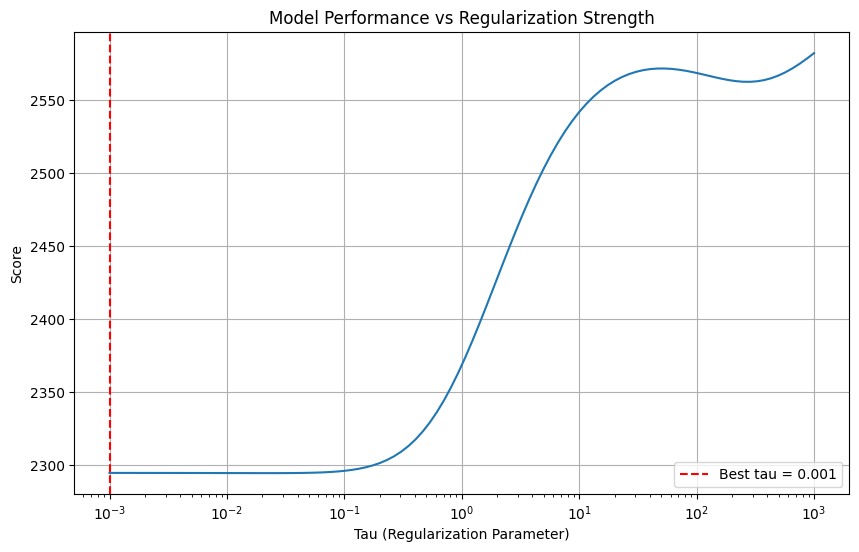

Best score: 2294.5585 at tau = 0.0010


In [37]:
import matplotlib.pyplot as plt

tau_values = np.logspace(-3, 3, 100)

result = model.select_tau(X_train, y_train, X_test, y_test, tau_values)
score_by_tau = result.scores


def plot_score_by_tau(tau_values, score_by_tau):
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.semilogx(
        tau_values, score_by_tau.values()
    )  # Using semilogx since tau_values are logarithmically spaced
    plt.grid(True)
    plt.xlabel("Tau (Regularization Parameter)")
    plt.ylabel("Score")
    plt.title("Model Performance vs Regularization Strength")

    # Add a vertical line at the best tau value
    best_tau_idx = np.argmin(score_by_tau)
    best_tau = tau_values[best_tau_idx]
    plt.axvline(
        x=best_tau, color="r", linestyle="--", label=f"Best tau = {best_tau:.3f}"
    )

    plt.legend()
    plt.show()

    # Print the best score and corresponding tau
    print(f"Best score: {result.best_score:.4f} at tau = {best_tau:.4f}")


plot_score_by_tau(tau_values, score_by_tau)

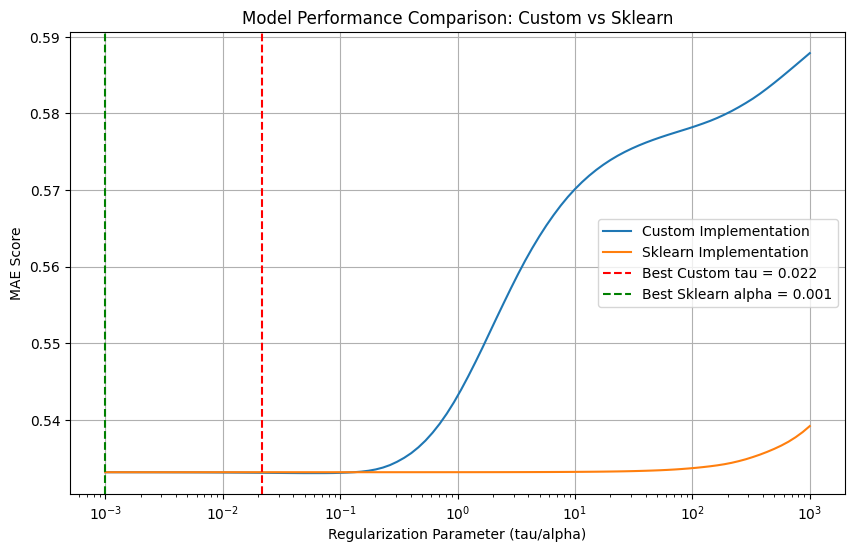

Best Custom score: 0.5331 at tau = 0.0215
Best Sklearn score: 0.5332 at alpha = 0.0010


In [40]:
# Create arrays to store scores
sklearn_scores = []
custom_scores = []

# Calculate scores for different alpha values (equivalent to tau in your implementation)
for alpha in tau_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    model_custom = RidgeRegression(tau=alpha)
    model_custom.fit(X_train, y_train)
    y_pred_custom = model_custom.predict(X_test)

    score_sklearn = mean_absolute_error(y_test, y_pred)
    score_custom = mean_absolute_error(y_test, y_pred_custom)

    sklearn_scores.append(score_sklearn)
    custom_scores.append(score_custom)

# Plot both implementations
plt.figure(figsize=(10, 6))
plt.semilogx(tau_values, custom_scores, label="Custom Implementation")
plt.semilogx(tau_values, sklearn_scores, label="Sklearn Implementation")
plt.grid(True)
plt.xlabel("Regularization Parameter (tau/alpha)")
plt.ylabel("MAE Score")
plt.title("Model Performance Comparison: Custom vs Sklearn")

# Add vertical lines for best values
best_tau_idx = np.argmin(list(score_by_tau.values()))
best_sklearn_idx = np.argmin(sklearn_scores)

plt.axvline(
    x=tau_values[best_tau_idx],
    color="r",
    linestyle="--",
    label=f"Best Custom tau = {tau_values[best_tau_idx]:.3f}",
)
plt.axvline(
    x=tau_values[best_sklearn_idx],
    color="g",
    linestyle="--",
    label=f"Best Sklearn alpha = {tau_values[best_sklearn_idx]:.3f}",
)

plt.legend()
plt.show()

# Print best scores
print(
    f"Best Custom score: {min(custom_scores):.4f} at tau = {tau_values[best_tau_idx]:.4f}"
)
print(
    f"Best Sklearn score: {min(sklearn_scores):.4f} at alpha = {tau_values[best_sklearn_idx]:.4f}"
)